In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.linalg as la
import math
from scipy.fftpack import fft,fftfreq
from scipy.linalg import toeplitz
from matplotlib import animation
from sklearn.model_selection import train_test_split
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

In [3]:
df =  pd.read_csv("data.csv")
df.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [4]:
df.describe()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
count,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,...,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(92000, 1025)

In [6]:
df = df.sample(frac=1).reset_index(drop = True)
df.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_33_ha
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_24_bha
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_13_daa
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_25_ma
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_23_ba


In [7]:
from sklearn.preprocessing import LabelBinarizer

df2 = df.copy()

df = df.drop(['character'],axis=1)
X = df.to_numpy()
X = np.reshape(X,(X.shape[0],32,32,1))


label = df2['character'].values

binencoder = LabelBinarizer()
y = binencoder.fit_transform(label)

print(X.shape)
print(y.shape)

(92000, 32, 32, 1)
(92000, 46)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(73600, 32, 32, 1)
(18400, 32, 32, 1)
(73600, 46)
(18400, 46)


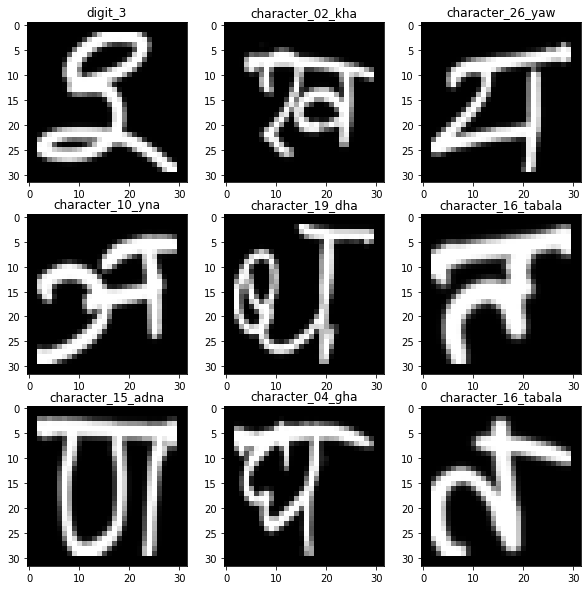

In [9]:
plt.figure(figsize=(10, 10))

for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.title(str(label[i]))
    plt.imshow(X[i].reshape((32,32)),cmap='gray')
# show the plot
plt.show()

In [17]:
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2),padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(46,activation='softmax'))

In [23]:

model.summary()
model.save("cnn_rushi_64.h5")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)         

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])
hist = model.fit(x_train,y_train,batch_size=128,epochs=20,verbose=1, validation_split= 0.15)

Epoch 1/20
489/489 [==============================] - 144s 289ms/step - loss: 2.8492 - accuracy: 0.3676 - val_loss: 0.2709 - val_accuracy: 0.9173
Epoch 2/20
489/489 [==============================] - 146s 299ms/step - loss: 0.2501 - accuracy: 0.9232 - val_loss: 0.1310 - val_accuracy: 0.9609
Epoch 3/20
489/489 [==============================] - 143s 292ms/step - loss: 0.1313 - accuracy: 0.9592 - val_loss: 0.0901 - val_accuracy: 0.9728
Epoch 4/20
489/489 [==============================] - 149s 306ms/step - loss: 0.0874 - accuracy: 0.9715 - val_loss: 0.0918 - val_accuracy: 0.9726
Epoch 5/20
489/489 [==============================] - 141s 288ms/step - loss: 0.0707 - accuracy: 0.9770 - val_loss: 0.0794 - val_accuracy: 0.9771
Epoch 6/20
489/489 [==============================] - 145s 296ms/step - loss: 0.0575 - accuracy: 0.9810 - val_loss: 0.0846 - val_accuracy: 0.9747
Epoch 7/20
489/489 [==============================] - 141s 288ms/step - loss: 0.0501 - accuracy: 0.9834 - val_loss: 0.0736 -

<Figure size 432x288 with 0 Axes>

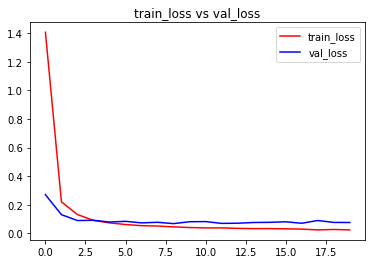

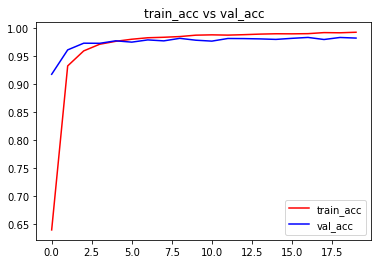

<Figure size 432x288 with 0 Axes>

In [21]:
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [20]:
model.evaluate(x_test, y_test,batch_size=128)


144/144 [==============================] - 10s 69ms/step - loss: 0.0847 - accuracy: 0.9817


[0.08473365008831024, 0.9817391037940979]